<img src="https://drive.google.com/uc?export=view&id=1WNLKH10YpQNNk9eeRIyYLwGkxNbNp-Mm" width="100%">

# Modelos de Tópicos
---

En este notebook veremos una introducción a los modelos de tópicos desde _Python_. Comenzamos importando las librerías necesarias:

In [ ]:
!pip install unidecode

In [ ]:
import re
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode
from IPython.display import display

## **1. Motivación**
---

Un modelo de tópicos es una técnica de procesamiento del lenguaje natural que se utiliza para analizar y entender el contenido de un corpus. El objetivo es identificar los temas o temas subyacentes que se discuten en esos documentos. Es una forma de agrupar y resumir automáticamente información contenida en un gran número de textos. Por ejemplo, en la siguiente figura vemos un ejemplo aplicado sobre un documento científico relacionado con bioinformática. Podemos ver que se encuentran algunos tópicos que podemos relacionar con genética (tópico 1), biología (tópico 2), computación (tópico 3). De la misma forma, también podemos ver qué tan importante es cada tópico para el documento en específico. Más adelante veremos cómo podemos interpretar estos modelos.

<img src="https://drive.google.com/uc?export=view&id=11ARBlZx2qpXjqmMzpohe28iOLD-M2MFn" width="80%">

Los modelos de tópicos utilizan una variedad de algoritmos para analizar el contenido de los documentos y extraer los temas subyacentes. Una vez que se han identificado los temas, se pueden utilizar para clasificar automáticamente nuevos documentos, hacer recomendaciones, generar resúmenes, entre otras aplicaciones.

En la creación de un modelo de tópicos se suelen seguir los siguientes pasos:

- **Selección y limpieza de los datos**: se recopilan y se limpian los datos a analizar para quedarnos con solo la información relevante.
- **Tokenización del texto**: se divide el texto en palabras o frases para poder analizarlas de manera individual.
- **Eliminación de palabras irrelevantes**: se eliminan las palabras que no aportan información relevante para el análisis, como artículos o preposiciones.
- **Creación del diccionario**: se crea un diccionario de todas las palabras relevantes y se les asigna un valor numérico.
- **Creación del modelo**: se utiliza un algoritmo específico para analizar los datos y asignar un tópico a cada palabra.

Existen diferentes algoritmos y técnicas que se utilizan para crear modelos de tópicos, los más populares son: **Latent Semantic Analysis (LSA)** y **Latent Dirichlet Allocation (LDA)**. Veremos cómo podemos entrenar este tipo de modelos.

## **2. Carga de Datos**
---

Como los modelos de tópicos se entrenan de forma no supervisada, lo único que necesitamos para entrenarlos es un conjunto de textos (también es posible utilizar un único documento si tokenizamos por oraciones).

En este caso usaremos el conjunto de datos **20 newsgroups**, la cual trata de una colección de alrededor de 11000 mensajes de noticias en 20 diferentes categorías o grupos de noticias. Los 20 grupos de noticias incluyen temas como ciencias políticas, religión, deportes, tecnología y ciencia. Cada mensaje incluye el encabezado del correo electrónico, el cuerpo del mensaje y el remitente. Los mensajes están en inglés y se encuentran en formato de texto plano.

Fue recolectado por el equipo de investigación de aprendizaje automático de la Universidad de Massachusetts en los años 90 y se ha utilizado ampliamente como una de las principales fuentes de datos para evaluar los algoritmos de aprendizaje automático y procesamiento del lenguaje natural. Este conjunto de datos es ampliamente utilizado en la investigación y la educación, ya que proporciona una variedad de textos en diferentes temas y una estructura de datos fácil de trabajar. Se utiliza para evaluar los algoritmos de clasificación de texto, extracción de características, agrupamiento de texto y otros problemas relacionados con el procesamiento del lenguaje natural.

Este conjunto de datos lo podemos cargar directamente desde `sklearn`, importamos la función correspondiente:

In [ ]:
from sklearn.datasets import fetch_20newsgroups

Procedemos a cargar el conjunto de datos eliminando algunos artefactos relacionados a etiquetas HTML:

In [ ]:
dataset = fetch_20newsgroups(remove=("headers", "footer", "quotes"))
display(dataset)

{'data': [' I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n',
  "A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days,

Ahora, extraemos el texto y los posibles tipos de noticias:

In [ ]:
corpus = dataset.data
labels = dataset.target_names
print(len(corpus))
print(len(labels))

11314
20


Veamos un documento al azar del conjunto de datos:

In [ ]:
idx = np.random.randint(len(corpus))
doc = corpus[idx]
print(doc)


Dear Tim:

You say that you were a "catholic," but if you do not believe in the Christian
God (I suppose that means the God of the Bible) and publicly state this,   
you are in all probability not a Roman Catholic.  "Public heretics, even
those who err in good faith (material heretics), do not belong to the body
of the Church" (Fundamentals of Catholic Dogma, 1960, Ludwig Ott, p. 311).

All is not lost, however, as you still might belong spiritually to the
Church by your desire to belong to it.  As you said, only God can judge
the condition of a man's soul.  About judgment, on the other hand, St. Paul 
1 Cor 5:12) urges Christians to judge their fellow Christians. 
Following the Apostle's teaching, I judge that you should reconsider   
returning to the Christian fold and embrace the God of Abraham, Isaac,
and Jacob.  He is the God who lives.  

Concerning what you were told about non-believers when you were a catholic,
that is true.  As I have posted before, Vatican II (Lumen Gentium,

Ahora, veamos los posibles tipos de noticias en el corpus:

In [ ]:
display(labels)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Estos corresponden a:

- `alt.atheism`: Noticias relacionadas con el ateísmo.
- `comp.graphics`: Noticias relacionadas con la computación gráfica.
- `comp.os.ms-windows.misc`: Noticias relacionadas con el sistema operativo Microsoft Windows.
- `comp.sys.ibm.pc.hardware`: Noticias relacionadas con el hardware de la computadora IBM PC.
- `comp.sys.mac.hardware`: Noticias relacionadas con el hardware de la computadora Macintosh.
- `comp.windows.x`: Noticias relacionadas con la interfaz gráfica de usuario de Windows X.
- `misc.forsale`: Noticias relacionadas con la venta de artículos.
- `rec.autos`: Noticias relacionadas con los automóviles.
- `rec.motorcycles`: Noticias relacionadas con las motocicletas.
- `rec.sport.baseball`: Noticias relacionadas con el béisbol.
- `rec.sport.hockey`: Noticias relacionadas con el hockey sobre hielo.
- `sci.crypt`: Noticias relacionadas con la criptografía.
- `sci.electronics`: Noticias relacionadas con la electrónica.
- `sci.med`: Noticias relacionadas con la medicina.
- `sci.space`: Noticias relacionadas con el espacio.
- `soc.religion.christian`: Noticias relacionadas con la religión cristiana.
- `talk.politics.guns`: Noticias relacionadas con la política de armas.
- `talk.politics.mideast`: Noticias relacionadas con la política del Medio Oriente.
- `talk.politics.misc`: Noticias relacionadas con la política en general.
- `talk.religion.misc`: Noticias relacionadas con la religión en general.

Es importante tener en cuenta que algunos de estos temas pueden ser amplios y pueden incluir subtemas específicos.

Ahora, vamos a definir una función para preprocesar los textos. Primero definimos un pipeline de `spacy` (para tokenizar, eliminar stopwords y etiquetar partes del discurso - POS tagging).

In [ ]:
nlp = spacy.load('en_core_web_sm',
                 exclude=['parser', 'senter', 'lemmatizer', 'ner'])
nlp.component_names

['tok2vec', 'tagger', 'attribute_ruler']

Ahora, definimos la función de preprocesamiento:

In [ ]:
def preprocess(text):
    no_chars = re.sub(r"[^a-z ]", " ", text) # eliminamos caracteres especiales
    doc = nlp(no_chars) # creamos un documento de spacy
    no_stops = " ".join(
        token.text
        for token in filter(
            lambda token: not token.is_stop  # eliminamos stopwords
                          and len(token) > 3 and len(token) < 24 # eliminamos palabras por longitud
                          and token.pos_ in ['NOUN', 'PROPN'], # dejamos solo sustantivos o nombres propios
            doc,
            )
        )
    norm_text = unidecode(no_stops.lower()) # normalizamos el texto
    no_spaces = re.sub(r"\s+", " ", norm_text) # eliminamos espacios duplicados
    return no_spaces.strip()

Preprocesamos el corpus:

In [ ]:
prep_corpus = list(map(preprocess, corpus))
display(prep_corpus[:5])

['door sports ricklin doors addition bumper rest body model engine specs years production history info mail hanks neighborhood erxst',
 'number souls clock oscillator experiences poll lease message experiences procedure speed speed cards adapters heat sinks hour usage disk functionality floppies days network knowledge base clock upgrade haven poll hanks guykuo washington',
 'folks ghost weekend life sooo market machine powerbook bunch questions dirt round powerbook introductions appearence summer haven access info rumors price drops powerbook line ones impression display disk feel display store opinions people worth disk size money display question machines computer store breifly opinions machine hellcats thanks bunch advance info summary news reading time premium finals corner twillis ngineering onvictions enemies truth ietzsche',
 'eitek address phone number information chip arris orporation jgreen harris omputer ivision thing person sense humor onathan',
 'article world tombaker wor

## **3. Extracción de Características**
---

Los modelos de tópicos por lo general se aplican sobre representaciones basadas en bolsas de palabras. Más adelante hablaremos un poco más en detalle de cada modelo. Por el momento nos concentraremos en entrenar vectorizadores para conteo de palabras y para TF-IDF. Comenzamos importándolos:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

Entrenamos los vectorizadores para utilizar únicamente los 500 términos más frecuentes:

In [ ]:
bow = CountVectorizer(max_features=500).fit(prep_corpus)
tfidf = TfidfVectorizer(max_features=500).fit(prep_corpus)

Ahora, extraemos las representaciones:

In [ ]:
features_bow = bow.transform(corpus)
features_tfidf = tfidf.transform(corpus)

También extraemos el vocabulario de cada tokenizador:

In [ ]:
vocab_bow = bow.get_feature_names_out()
vocab_tfidf = tfidf.get_feature_names_out()

## **4. Latent Semantic Analysis**
---

El Análisis Semántico Latente (Latent Semantic Analysis o LSA) es una técnica de procesamiento del lenguaje natural que se utiliza para analizar y comprender el contenido de un conjunto de documentos. El objetivo es identificar los temas subyacentes que se discuten en esos documentos y establecer relaciones semánticas entre las palabras y frases. Es una forma de agrupar y resumir automáticamente la información contenida en un gran número de textos.

LSA se basa en la idea de que las palabras que aparecen juntas en un documento tienden a tener un significado relacionado. Por ejemplo, las palabras "perro" y "ladrar" probablemente están relacionadas semánticamente, ya que un perro ladra. El objetivo de LSA es encontrar estas relaciones semánticas ocultas entre las palabras en un conjunto de documentos.

Para llevar a cabo el análisis, se crea una matriz documento-término (bolsa de palabras) que representa los conteos de los términos (palabras) en los documentos. Cada celda en la matriz contiene el número de veces que aparece un término en un documento. Esta matriz se llama matriz de contenido. A continuación, se aplica una técnica de reducción de dimensionalidad, como la descomposición en valores singulares (SVD), para reducir la dimensionalidad de la matriz de contenido.

<img src="https://drive.google.com/uc?export=view&id=1f-GEwcEPXMFLETqhq2QRVEZg_whsGZAb" width="80%">

SVD divide la matriz en tres componentes: una matriz documento-tópico $\mathbf{U}$, una matriz tópico-término $\mathbf{V}$ y una matriz de importancias $\mathbf{S}$. Estas tres matrices tienen su interpretación:

- **Matriz documento-tópico**: se trata de una matriz de características (funciona como _embedding_) que representa cada documento como una composición de varios tópicos.
- **Matriz de importancias**: esta matriz muestra qué tan importante es cada tópico para todo el corpus.
- **Matriz tópico-término**: se trata de una matriz que muestra qué tan importante es cada término para un tema.

### **4.1. Implementación**
---

Para implementar este modelo vamos a usar la descomposición de `sklearn`:

In [ ]:
from sklearn.decomposition import TruncatedSVD

En **LSA** se utiliza el enfoque **TF-IDF** en lugar de contar simplemente el número de veces que aparece un término en un documento, por varias razones:

- **Manejo de términos irrelevantes**: algunos términos comunes aparecen con mucha frecuencia en todos los documentos y no aportan información relevante para el análisis. TF-IDF tiene en cuenta estos términos y los penaliza.
- **Importancia relativa de los términos**: algunos términos son más importantes que otros en un documento. TF-IDF tiene en cuenta no solo la frecuencia de un término en un documento, sino también su frecuencia en todos los documentos del corpus.
- **Discriminación de términos**: LSA utiliza SVD para reducir la dimensionalidad de la matriz de representación, y algunos términos son necesarios para discriminar entre los documentos. TF-IDF ayuda a identificar estos términos importantes y a incluirlos en la representación.
- **Mejora de la precisión**: al utilizar TF-IDF en lugar de conteos simples, se obtiene una representación continua con una magnitud controlada, esto facilita la precisión numérica en el algoritmo SVD.

Los hiperparámetros de TruncatedSVD de `sklearn` para implementar LSA son:

- `n_components`: Es el número de componentes o dimensiones deseadas en la reducción de dimensionalidad. Este valor representa el número de tópicos o temas que deseamos encontrar.
- `algorithm`: El algoritmo utilizado para calcular la descomposición SVD. Los valores posibles son "arpack" y "randomized". El valor predeterminado es "randomized" que es más rápido para matrices grandes.
- `n_iter`: Número de iteraciones para el algoritmo "randomized". El valor predeterminado es 5.
- `random_state`: Es la semilla utilizada para la inicialización del generador de números aleatorios.

Es importante tener en cuenta que, al elegir los valores para estos hiperparámetros, debe tener en cuenta el tamaño de su conjunto de datos y los requisitos de precisión y tiempo de ejecución. En este caso usaremos los siguientes valores:

In [ ]:
lsa = TruncatedSVD(
        n_components = 20,
        algorithm = "randomized",
        random_state = 42,
        n_iter = 100
        ).fit(features_tfidf)

### **4.2. Tópicos por Documento**
---

Comenzaremos extrayendo una matriz de representación de los textos como si fuera un _embedding_, para esto, usaremos el método `transform` del modelo:

In [ ]:
features_lsa = lsa.transform(features_tfidf)
print(features_lsa.shape)

(11314, 20)


Como podemos ver, cada documento fue mapeado a una representación de tamaño 20. No obstante, se trata de una representación que resume todo el vocabulario en únicamente 20 temas.

Podemos visualizar la representación de un documento específico:

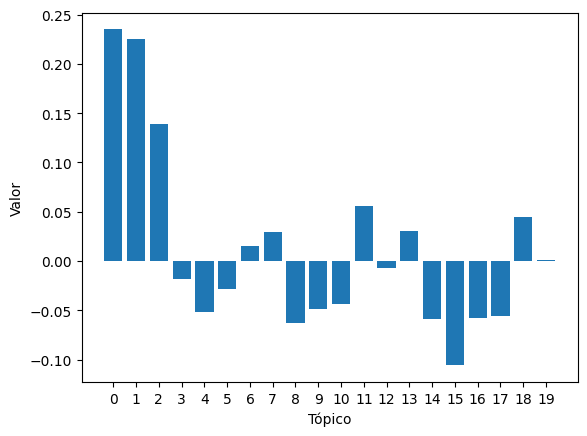

In [ ]:
doc_id = 0
doc_features = features_lsa[doc_id]
fig, ax = plt.subplots()
ax.bar(np.arange(doc_features.size), doc_features);
ax.set_xlabel("Tópico");
ax.set_ylabel("Valor");
ax.set_xticks(np.arange(doc_features.size));
fig.show()

LSA se caracteriza por ser el modelo de tópicos de menor costo computacional (se entrena bastante rápido). No obstante, no se puede interpretar tan fácilmente, ya que utiliza valores negativos y en una escala que depende de los datos originales.

En ese caso, podemos ver la importancia de cada tópico en un documento específico si miramos la magnitud de su representación, es decir, el valor absoluto:

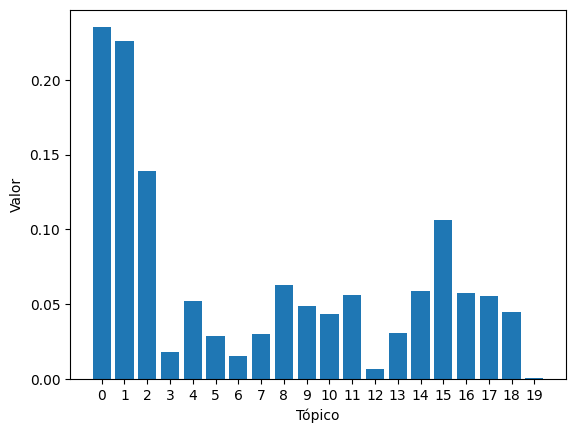

In [ ]:
doc_id = 0
doc_features = np.abs(features_lsa[doc_id])
fig, ax = plt.subplots()
ax.bar(np.arange(doc_features.size), doc_features)
ax.set_xlabel("Tópico")
ax.set_ylabel("Valor")
ax.set_xticks(np.arange(doc_features.size));
fig.show()

Esta representación suele ser muy usada como _embedding_ de documentos. Veamos un ejemplo de similitud semántica con el siguiente documento:

In [ ]:
doc_id = 1
print(corpus[doc_id])

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



Como podemos ver, es un texto que habla de hardware de computadores. Vamos a evaluar la similitud coseno con la representación LSA de cada uno de los documentos para determinar los más similares. Importamos la función para la similitud:

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

Evaluamos la similitud:

In [ ]:
sim = cosine_similarity(features_lsa[doc_id, np.newaxis], features_lsa).flatten()
print(sim.shape)

(11314,)


Ahora, creamos un `DataFrame` para encontrar el top de los documentos más similares:

In [ ]:
sims = pd.DataFrame(data={"text": corpus, "sim": sim})
top5 = (
        sims
        .sort_values(by="sim", ascending=False)
        .head(6)
        )

Veamos los documentos más relevantes:

In [ ]:
for doc in top5.iloc[1:, 0]:
    print("=" * 50)
    print(doc)

Do all SCSI cards for DOS systems require a separate device driver to be loaded
into memory for each SCSI device hooked up?  Will this also be true of the 32-bit
OS's?

Thanks.

Randy


Hi all:
Thanks to you all who have responded
to my request for info on various kinds of fax modem.
I'd like to ask a few more questions.
1.  What are the advantages of buying a global village
Teleport Gold over other cheaper brands like Supra, Zoom etc?
2.  I heard that both Supra and Zoom use the same software.
Why are there so many complaints about the incompatibility problems
of Supra?  What kind of incompatibility is it?
3.  If I decided to buy the Teleport Gold, is there any
possibility to add a voice option in the near future?
4.  Has anyone heard of a possible voice option that Supra will offer
this coming summer?
5.  A person did mention a new AT&T modem.  Is it
getting good reviews from various Mac Magazines?
6.  If I want the best, fastest, most economically sound and
possible voice option, wh

Como podemos ver, estos documentos también hablan sobre hardware.

### **4.3. Términos por Tópico**
---

La matriz tópico-término nos ofrece información muy valiosa para la interpretación de los tópicos. En especial, nos permite saber cuáles son las palabras más importantes en los temas que encontró el modelo.

Podemos acceder a esta matriz por medio del atributo `components_` del modelo:

In [ ]:
components = lsa.components_
print(components.shape)

(20, 500)


Como podemos ver, nos muestra la importancia de cada una de las 500 palabras del vocabulario para cada uno de los 20 tópicos. Veamos el top 15 de las palabras más importantes por cada tópico:

In [ ]:
# Iteramos sobre cada tópico
for i, comp in enumerate(components):
    # Juntamos los términos con cada uno de los valores en la matriz V
    terms_comp = zip(vocab_tfidf, np.abs(comp))
    # Ordenamos los términos de acuerdo al resultado de LSA
    sorted_terms = sorted(
            terms_comp,
            key=lambda x: x[1],
            reverse=True
            )[:15]
    # Mostramos los términos más importantes en cada tópico
    print(
            "Tópico {}: {}".format(
                i,
                " ".join(list(map(lambda x:x[0], sorted_terms)))
                )
            )

Tópico 0: thanks people right need time work mail help system windows problem internet drive year years
Tópico 1: thanks people right advance windows time mail government email years year world point state things
Tópico 2: thanks right people windows need drive internet system computer card file work software problem disk
Tópico 3: right people game team year games season hockey players league government player teams thanks time
Tópico 4: right game team year time games windows season hockey players league years player teams file
Tópico 5: need internet mail phone technology uunet computer research email software windows science opinions help information
Tópico 6: internet need drive windows mail work problem time right phone uunet card system technology file
Tópico 7: drive windows file drives program files internet window work controller power disk version computer graphics
Tópico 8: people work time windows drive internet game team space card need nasa games bike year
Tópico 9: work

Con esto podemos ver algunos tópicos clave como:

- **Tópico 4**: deportes.
- **Tópico 7**: hardware.

No obstante, muchos de los otros tópicos parecen mezclar distintos temas (baja coherencia).

Este tipo de análisis se puede ver de mejor forma con una visualización de nubes de palabras. Importamos la librería:

In [ ]:
from wordcloud import WordCloud

Vamos a generar una nube de palabras ponderada con la importancia de cada término en un tópico:

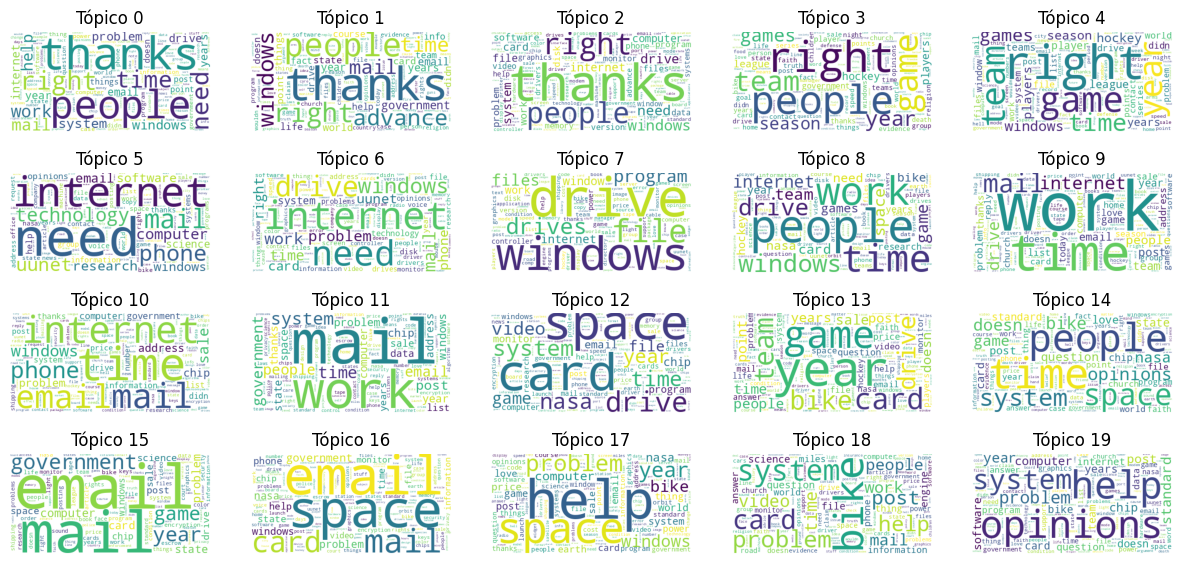

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(15, 7))
cont = 0
for i in range(4):
    for j in range(5):
        ax = axes[i, j]
        freqs = {
            term: abs(float(importance))
            for term, importance in zip(vocab_tfidf, components[cont])
        }
        wc = WordCloud(background_color="white").generate_from_frequencies(freqs)
        ax.imshow(wc)
        ax.axis("off")
        ax.set_title(f"Tópico {cont}")
        cont += 1
fig.show()

### **4.4. Importancia de Tópicos**
---

También podemos ver qué tan importante es cada tópico dentro del corpus con la matriz de importancias de tópico. Se trata de una matriz diagonal con un valor que puede estar normalizado; se puede extraer por medio del atributo `explained_variance_ratio_` del modelo:

In [ ]:
topic_importances = lsa.explained_variance_ratio_
print(topic_importances.shape)

(20,)


El resultado es directamente la diagonal de la matriz. Podemos generar una gráfica en forma de diagrama de barras para ver estas importancias:

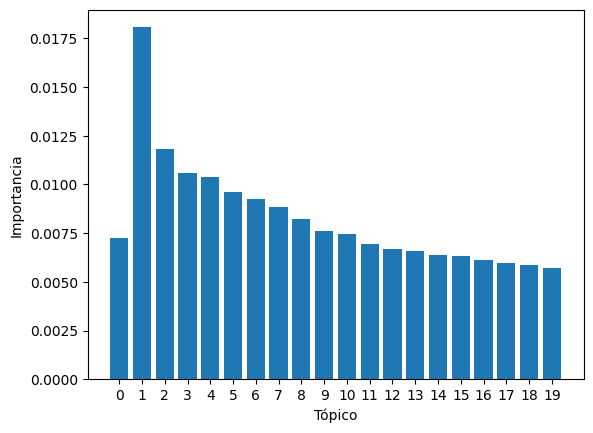

In [ ]:
fig, ax = plt.subplots()
ax.bar(np.arange(topic_importances.size), topic_importances)
ax.set_xticks(np.arange(topic_importances.size))
ax.set_xlabel("Tópico")
ax.set_ylabel("Importancia")
fig.show()

## **5. Latent Dirichlet Allocation**
---

El modelo de tópicos Latent Dirichlet Allocation (LDA) es un algoritmo de aprendizaje automático no supervisado utilizado para identificar los temas subyacentes que se discuten en un conjunto de documentos. LDA asume que cada documento está compuesto por una mezcla de tópicos y que cada tópico está compuesto por una mezcla de palabras.

<img src="https://drive.google.com/uc?export=view&id=1j1neXJH2PhQiS5Nz1Mi3F8-BY312BvWg" width="80%">

LDA utiliza una distribución de probabilidad generativa para modelar cómo se generan los documentos. La idea es que, dado un conjunto de tópicos, se asigna un tópico a cada palabra en un documento de forma aleatoria. Luego, se utiliza la distribución de probabilidad para generar nuevos documentos que se ajusten al conjunto de datos original.

La implementación de LDA requiere especificar el número de tópicos a generar, el número de palabras en cada tópico y las distribuciones de probabilidad para cada uno. Luego, se utiliza un algoritmo de optimización para ajustar estos parámetros al conjunto de datos.

LDA es un modelo probabilístico que se basa en la teoría Bayesiana, pero más allá de entender los detalles matemáticos, en este caso nos interesa ver su aplicabilidad práctica. En LDA tenemos los dos siguientes parámetros:

- $\alpha$: es un parámetro de la distribución Dirichlet que representa la densidad documento-tópico. Entre más grande sea el valor de $\alpha$, cada documento estará conformado por más tópicos.
- $\beta$: es el parámetro _a priori_ que representa la densidad tópico-término. Con un valor grande de $\beta$ los tópicos se conforman de un mayor número de palabras.

LDA es un modelo muy similar a LSA, con la diferencia de que todas las representaciones y elementos internos son probabilidades, lo que facilita su interpretación. No obstante, LDA es un modelo con mayor costo computacional (puede tardar más tiempo en entrenar).

### **5.1. Implementación**
---

Para implementar LDA utilizaremos el modelo de descomposición desde `sklearn`:

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

En **LDA** se utilizan **conteos de palabras** en lugar de **TF-IDF**, debido a que el modelo de tópicos LDA es una distribución generativa, donde se asume que cada documento es una mezcla de tópicos y cada tópico es una mezcla de palabras.

Los conteos de palabras representan la frecuencia de una palabra en un documento, lo que es importante para LDA, ya que asume que las palabras con una mayor frecuencia en un documento son más probables de ser asociadas con el tópico del documento. En cambio, TF-IDF se utiliza para representar la importancia relativa de una palabra en un documento en comparación con el conjunto de documentos, lo que no es necesario para LDA, ya que se asume que cada documento es independiente.

Además, LDA se basa en la idea de que los tópicos son distribuciones de probabilidad sobre las palabras, y los conteos de palabras son adecuados para representar esta distribución. Al utilizar conteos de palabras en lugar de TF-IDF, se pueden calcular las probabilidades de las palabras en cada tópico y en cada documento, lo que es esencial para el funcionamiento del modelo.

Procedemos a entrenar el modelo con la representación de bolsa de palabras. Tiene los siguientes hiperparámetros:

- `n_components`: número de tópicos.
- `doc_topic_prior`: valor $\alpha$.
- `topic_word_prior`: valor $\beta$.
- `random_state`: semilla de números aleatorios.

In [ ]:
lda = LatentDirichletAllocation(
    n_components=20,
    doc_topic_prior=1 / 20,
    topic_word_prior=1 / 20,
    random_state=42,
    ).fit(features_bow)

### **5.2. Tópicos por Documento**
---

Comenzamos extrayendo la matriz documento-tópico con el método `transform` del modelo:

In [ ]:
features_lda = lda.transform(features_bow)
print(features_lda.shape)

(11314, 20)


Podemos visualizar la representación de un documento:

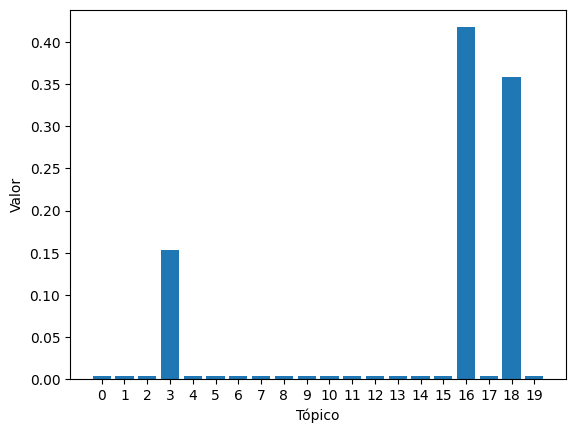

In [ ]:
doc_id = 0
doc_features = features_lda[doc_id]
fig, ax = plt.subplots()
ax.bar(np.arange(doc_features.size), doc_features);
ax.set_xlabel("Tópico");
ax.set_ylabel("Valor");
ax.set_xticks(np.arange(doc_features.size));
fig.show()

Como podemos ver, se trata de valores entre 0 y 1 (son probabilidades) y la suma es 1:

In [ ]:
print(np.round(doc_features.sum(),4))

1.0


Al igual que en LSA, el modelo LDA también captura relaciones semánticas entre documentos. Veamos un ejemplo con la similitud coseno, primero seleccionamos un documento:

In [ ]:
doc_id = 1
print(corpus[doc_id])

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



Calculamos la similitud:

In [ ]:
sim = cosine_similarity(features_lda[doc_id, np.newaxis], features_lda).flatten()
print(sim.shape)

(11314,)


Ahora, creamos un `DataFrame` para encontrar el top de los documentos más similares:

In [ ]:
sims = pd.DataFrame(data={"text": corpus, "sim": sim})
top5 = (
        sims
        .sort_values(by="sim", ascending=False)
        .head(6)
        )

Veamos los documentos más relevantes:

In [ ]:
for doc in top5.iloc[1:, 0]:
    print("=" * 50)
    print(doc)

someone gave me this brand new card.  I am thinking to sell it cuz
I don't need it.  but the problem is that i don't even know what this
is.
this was made by Forte Communications Co. it has 2 board combined
together (looks wierd  to me) and has 2 9 pin ports (one male and one
female), and also has a round port (like BNC, not sure).
this was made in 1986, and has a "fortegraph emulator & diagnostic" disk
with it.

has anyone here ever seen this or known what this is.

appreciate your help in advance.

eric

: |> 
: |>         Is there any way to connect two pointing devices to one serial
: |>         port? I haven't tried this but I believe they would interfere
: |>         with each other (?) even if only one at a time would be used.

: 	Just get an A-B switch for RS232. Look in Computer Shopper.
: They are available fairly cheap. They allow switching between two
: serial devices on a single port.

Unfortunately the poster wants to use an internal and an external modem so a
switch isn'

Como podemos ver, estos documentos también hablan sobre hardware de computadores.

### **5.3. Términos por Tópico**
---

LDA se caracteriza por obtener mejores resultados en comparación con LSA. Esto se puede evidenciar en la matriz tópico-término aprendida, la cual podemos extraer con el atributo `components_` del modelo:

In [ ]:
components = lda.components_
print(components.shape)

(20, 500)


Como podemos ver, nos muestra la importancia de cada una de las 500 palabras del vocabulario para cada uno de los 20 tópicos. Veamos el top 15 de las palabras más importantes por cada tópico:

In [ ]:
# Iteramos sobre cada tópico
for i, comp in enumerate(components):
    # Juntamos los términos con cada uno de los valores en la matriz V
    terms_comp = zip(vocab_bow, np.abs(comp))
    # Ordenamos los términos de acuerdo al resultado de LSA
    sorted_terms = sorted(
            terms_comp,
            key=lambda x: x[1],
            reverse=True
            )[:15]
    # Mostramos los términos más importantes en cada tópico
    print(
            "Tópico {}: {}".format(
                i,
                " ".join(list(map(lambda x:x[0], sorted_terms)))
                )
            )

Tópico 0: problem work bike problems cars list time speed board thanks road printer port company help
Tópico 1: window server application widget program code display file manager version subject user value export problem
Tópico 2: game team year games season league hockey players player teams time points years right didn
Tópico 3: program year years time research jobs system launch work package market development states press satellite
Tópico 4: people government state rights right country states peace today land laws society history population years
Tópico 5: windows card memory video monitor system screen thanks drivers driver cards problem modem mode mouse
Tópico 6: encryption system information security internet privacy technology keys access government chip computer data mail phone
Tópico 7: file chip water chips number sound bits unit control keys house system numbers code family
Tópico 8: power period right guns body light weapons self defense radio control problem goal time fir

Con esto podemos ver más tópicos clave como:

- **Tópico 3 y 15**: religión.
- **Tópico 4**: software.
- **Tópico 11 y 17**: hardware.
- **Tópico 12 y 16**: ciencia e investigación.
- **Tópico 13**: criptografía.
- **Tópico 14**: política.
- **Tópico 18**: deportes.

Vamos a generar una nube de palabras ponderada con la importancia de cada término en un tópico para visualizar mejor los tópicos:

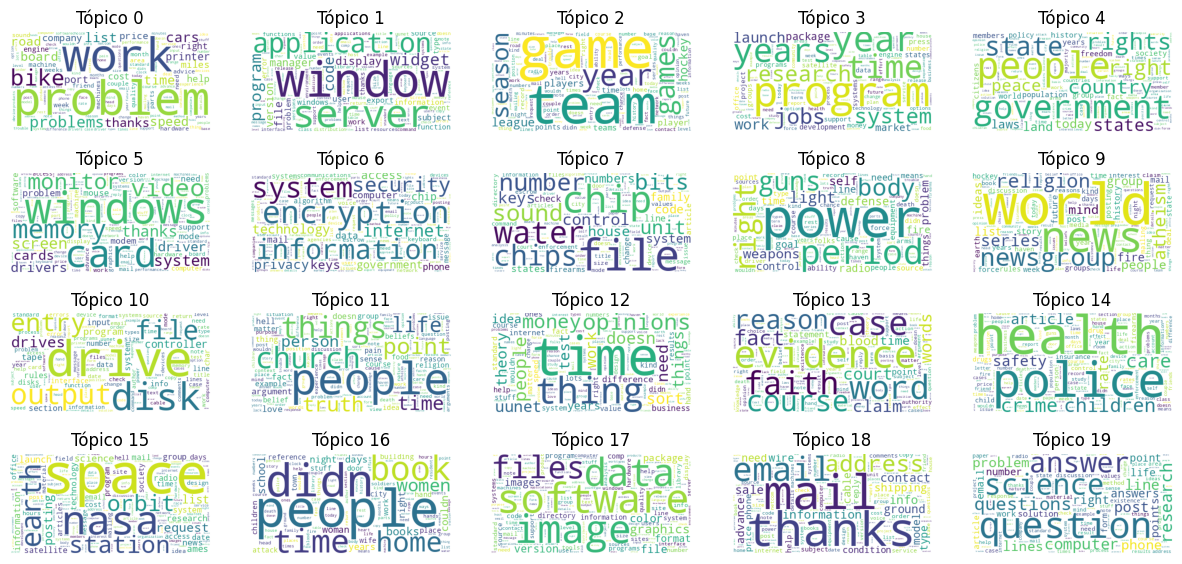

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(15, 7))
cont = 0
for i in range(4):
    for j in range(5):
        ax = axes[i, j]
        freqs = {
            term: abs(float(importance))
            for term, importance in zip(vocab_bow, components[cont])
        }
        wc = WordCloud(background_color="white").generate_from_frequencies(freqs)
        ax.imshow(wc)
        ax.axis("off")
        ax.set_title(f"Tópico {cont}")
        cont += 1
fig.show()

### **5.4. Importancia por Tópico**
---

El modelo LDA no nos da directamente las importancias de cada tópico dentro del corpus. No obstante, como estamos manejando probabilidades, estas importancias se pueden calcular directamente con la matriz de documento-tópico al promediar la contribución de los documentos. Es decir:

In [ ]:
topic_importances = features_lda.mean(axis=0)
print(topic_importances.shape)

(20,)


Podemos generar una gráfica en forma de diagrama de barras para ver estas importancias:

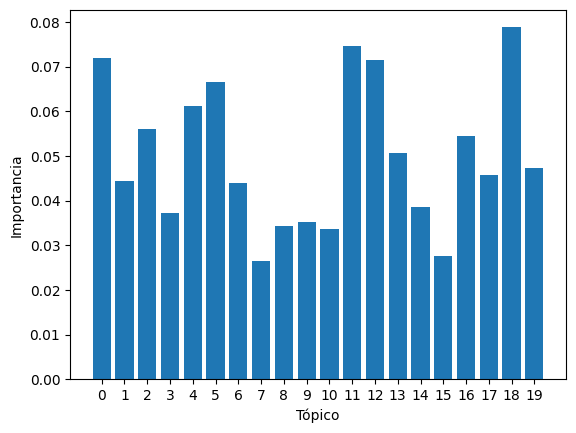

In [ ]:
fig, ax = plt.subplots()
ax.bar(np.arange(topic_importances.size), topic_importances)
ax.set_xticks(np.arange(topic_importances.size));
ax.set_xlabel("Tópico")
ax.set_ylabel("Importancia")
fig.show()

Por último, existe una herramienta conocida como **pyLDAvis**, la cual es una librería de Python para visualizar modelos de tópicos Latent Dirichlet Allocation (LDA) desarrollada por Carson Sievert. La biblioteca proporciona una interfaz web interactiva que permite explorar y comprender fácilmente los tópicos generados por un modelo LDA.

pyLDAvis genera una visualización interactiva que muestra los tópicos en un plano de coordenadas de dos dimensiones, donde cada punto representa un tópico y los puntos cercanos entre sí representan tópicos similares. Los tópicos se pueden explorar haciendo clic en ellos para ver las palabras más importantes y los documentos asociados.

También incluye un mapa de calor que muestra las palabras más relevantes para cada tópico, una nube de palabras que muestra la frecuencia de las palabras en los tópicos y un gráfico de barras que muestra la distribución de los tópicos en los documentos.

pyLDAvis es una herramienta útil para explorar y comprender los resultados de un modelo LDA, y puede ser utilizado para ajustar los parámetros del modelo y para seleccionar el número óptimo de tópicos.

Vamos a instalarla:

In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 80.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.2.2 which is incompatible.


Por problemas de compatibilidad, es necesario utilizar una version de `pandas < 2.0.0`. **Puede necesitar reiniciar el entorno de ejecución una vez**

In [ ]:
!pip install pandas==1.5.3

  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.
xarray 2024.6.0 requires pandas>=2.0, but you have pandas 1.5.3 which is incompatible.


Importamos la librería para su uso con `sklearn`:

In [ ]:
import pyLDAvis
import pyLDAvis.lda_model as sklearn_lda

Habilitamos el uso de la librería en notebooks:

In [ ]:
pyLDAvis.enable_notebook()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Especificamos a la librería el vectorizador usado y el modelo LDA entrenado:

In [ ]:
bow.get_feature_names = bow.get_feature_names_out
ldavis_prepared = sklearn_lda.prepare(lda, features_bow, bow)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Podemos visualizar el tablero interactivo de LDA:

In [ ]:
display(ldavis_prepared)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
11     0.202924  0.035457       1        1  8.342698
4      0.186825 -0.046048       2        1  7.348999
17    -0.256439 -0.007355       3        1  7.306709
6     -0.132852 -0.115647       4        1  6.175283
1     -0.181471  0.064023       5        1  5.933233
16     0.168960  0.034366       6        1  5.642632
5     -0.231876  0.063196       7        1  5.466321
3     -0.000901 -0.086036       8        1  5.317713
18    -0.166284 -0.045762       9        1  5.218120
0     -0.022322  0.065529      10        1  5.136962
12     0.124883  0.083608      11        1  4.959653
10    -0.214718  0.102983      12        1  4.871105
13     0.133950  0.031677      13        1  4.666805
2      0.131575  0.022959      14        1  4.488733
14     0.151818  0.020860      15        1  4.194793
19     0.000706  0.031647      16        1  3.769435
15    -0.072379 -0.283384      17        1  3.195220
8      0.144375  0.153567      18        1  2.859912
9      0.149515 -0.216988      19        1  2.684636
7     -0.116289  0.091347      20        1  2.421037, topic_info=        Term         Freq        Total Category  logprob  loglift
425    space  1415.000000  1415.000000  Default  30.0000  30.0000
159     file  1790.000000  1790.000000  Default  29.0000  29.0000
345    power  1164.000000  1164.000000  Default  28.0000  28.0000
495    world  1233.000000  1233.000000  Default  27.0000  27.0000
118    drive  1200.000000  1200.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
58    change    40.391587   632.637125  Topic20  -4.8131   0.9697
27   article    40.705564   647.944167  Topic20  -4.8053   0.9535
438   system    74.339974  2085.663930  Topic20  -4.2030   0.3868
244     line    44.405467   946.549870  Topic20  -4.7183   0.6615
268  message    37.315020   623.417620  Topic20  -4.8923   0.9052

[812 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.076004  ability
0         2  0.014251  ability
0         3  0.085505  ability
0         4  0.147258  ability
0         8  0.019001  ability
...     ...       ...      ...
498      15  0.058543    years
498      16  0.000681    years
498      17  0.015657    years
498      18  0.014295    years
498      19  0.025868    years

[4195 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 5, 18, 7, 2, 17, 6, 4, 19, 1, 13, 11, 14, 3, 15, 20, 16, 9, 10, 8])

También podemos exportarlo como un HTML para embeberlo, reutilizarlo o modificarlo:

In [ ]:
pyLDAvis.save_html(ldavis_prepared, "./ldavis_prepared.html")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Recursos Adicionales**
---

Los siguientes enlaces corresponden a sitios donde encontrará información muy útil para profundizar en los temas vistos en este taller guiado:

- [Dimensionality reduction using truncated SVD (aka LSA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html).
- [Latent Dirichlet Allocation](https://scikit-learn.org/stable/modules/decomposition.html#latentdirichletallocation).

## **Créditos**

* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
    - [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](mailto:rsuperlano@unal.edu.co).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*